In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import binomtest,chisquare,ttest_1samp,chi2_contingency,ttest_ind,f_oneway,pearsonr
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder,MinMaxScaler,StandardScaler,PolynomialFeatures,RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest,f_classif,f_regression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.pipeline  import Pipeline , make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold

#les modeles

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

# les METRIQUES DE REGRESSION ON A 3 METRIQUES 

# -MAE(MEAN ABSOLUTE ERROR) a utiliser c'est mieux pour explique les erreurs 
# -MSE(MEAN SQUARED ERROR)
# -RMSE(ROOT MEAN SQUARED ERROR)

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [3]:
X,y = fetch_california_housing(return_X_y=True)

In [4]:
model = LinearRegression()
model.fit(X,y)
predictions = model.predict(X)

In [5]:
predictions

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363], shape=(20640,))

In [6]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [7]:
differences = predictions -y

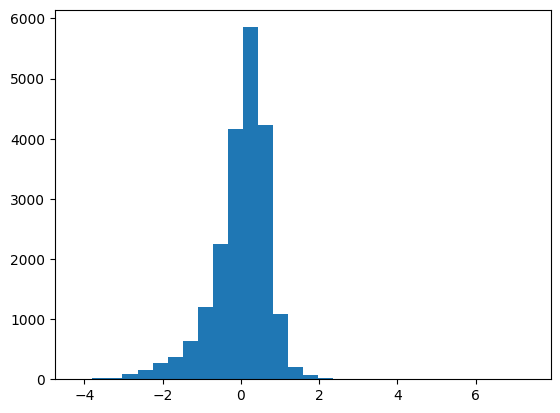

In [8]:
plt.hist(differences,bins=30)
plt.show()

In [9]:
mean_absolute_error(y_true=y,y_pred=predictions)

0.5311643817546456

In [10]:
mean_squared_error(y_true=y,y_pred=predictions)

0.5243209861846072

In [11]:
root_mean_squared_error(y_true=y,y_pred=predictions)

0.7241001216576387

# le SCORE R2   le coefficient de determination

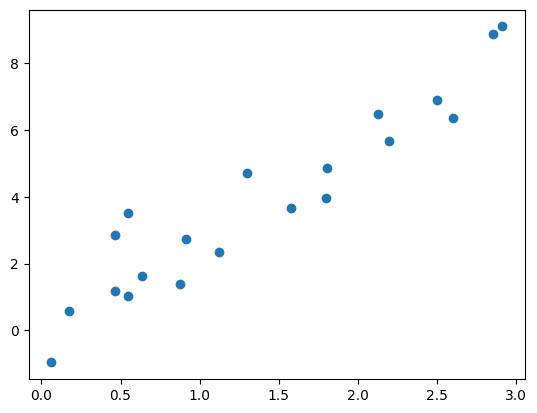

In [12]:
from sklearn.metrics import r2_score
np.random.seed(42)
x=np.random.rand(20,1)*3
y = ( x*3 + np.random.randn(20,1).reshape(-1,1))

plt.scatter(x,y)
plt.show()

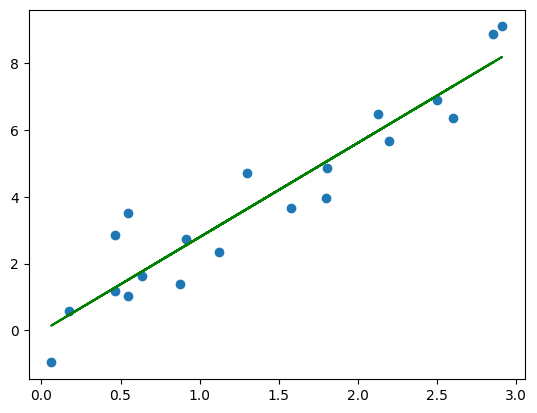

In [13]:
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)


plt.scatter(x,y)
plt.plot(x,y_pred,c='green')
plt.show()

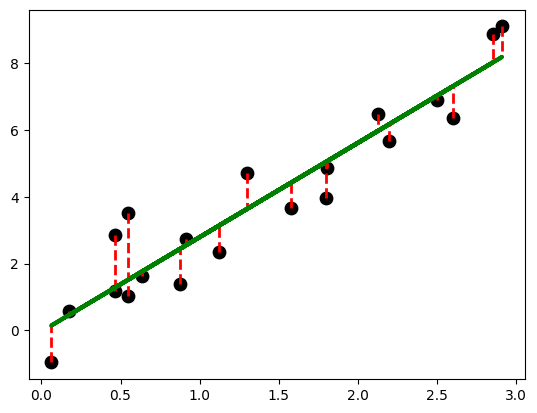

In [14]:
for i in range(len(x)):
    plt.plot([x[i][0], x[i][0]], [y[i][0], y_pred[i][0]], color='red', linestyle='--', lw=2)
    
plt.scatter(x, y, s=80, c='k', zorder=1)
plt.plot(x, y_pred, color='green', lw=3, label="Modèle linéaire")
plt.show()


In [15]:
r2_score(y,y_pred)

0.8930196671440435

# CONFUSION METRIQUE CAS DE CLASSIFICATION

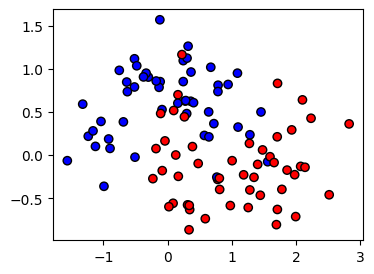

In [16]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.3, random_state=42)

plt.figure(figsize=(4, 3))

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='bwr')

plt.show()


In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


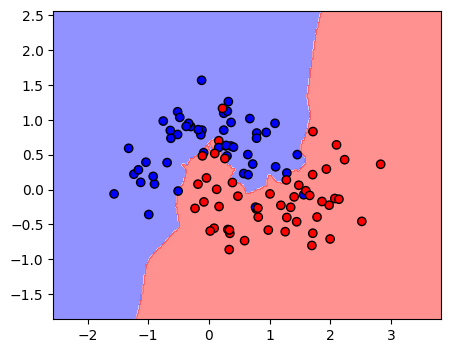

In [18]:
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.figure(figsize=(5, 4))
plt.contourf(xx, yy, z, alpha=0.5, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='bwr')
plt.show()


In [19]:
y_pred = knn.predict(X)
cm = confusion_matrix(y,y_pred)
cm

array([[45,  5],
       [ 2, 48]])

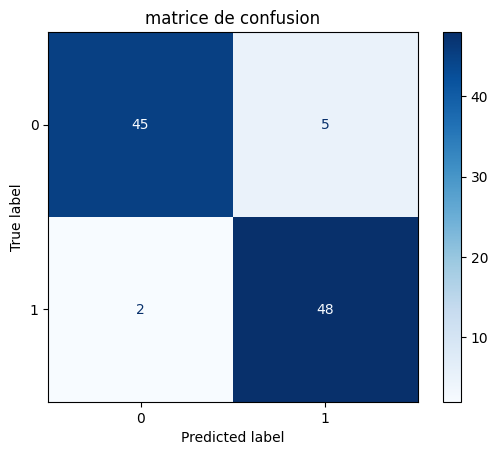

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("matrice de confusion")
plt.show()

# ACCURECY

In [21]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,precision_recall_curve,f1_score,classification_report
accuracy_score(y_true=y,y_pred=y_pred)
#notre algorithme a repondu correctement 93% du temps

0.93

In [22]:
precision_score(y_true=y,y_pred=y_pred)


0.9056603773584906

In [23]:
recall_score(y_true=y,y_pred=y_pred)

0.96

In [24]:
knn.predict_proba(X)[:,1]

array([1.        , 0.33333333, 0.66666667, 0.        , 0.66666667,
       0.        , 0.33333333, 1.        , 0.        , 0.66666667,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.33333333, 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.66666667, 0.        , 0.66666667,
       0.33333333, 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.33333333, 1.        ,
       0.        , 1.        , 0.66666667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.33333333, 1.        , 0.33333333, 1.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 0.        ,
       0.66666667, 0.33333333, 1.        , 0.        , 0.66666667,
       0.66666667, 0.66666667, 0.33333333, 0.        , 0.66666667,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.     

In [25]:
precision,recall,threshold = precision_recall_curve(y,knn.predict_proba(X)[:,1])

/tmp/ipykernel_266390/888244650.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


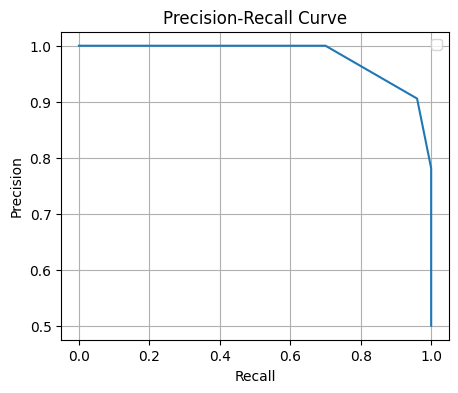

In [26]:
plt.figure(figsize=(5, 4))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

In [27]:
f1_score(y,y_pred)

0.9320388349514563

In [28]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.91      0.96      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

